In [1]:
import numpy as np 
import time
import matplotlib.pyplot as plt

In [2]:
from moara_for_qiskit import MoaraSimulator
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.providers.models import QasmBackendConfiguration
from qiskit.providers import BaseBackend

In [18]:
max_depth = 20
shot_count = 1

def getQiskitSimulator():
    return BasicAer.get_backend('qasm_simulator')
    #return Aer.get_backend('qasm_simulator')

def entangler(circuit,n):
    for i in range(n-1):
        circuit.crx(3,i,i+1)

def entanglerReverse(circuit,n):
    for i in range(n):
        target = n-i-1
        if i != target:
            circuit.crx(np.pi/7,i,target)

def entanglerCX(circuit,n):
    for i in range(n-1):
        circuit.cx(i,i+1)

def entanglerReverseCX(circuit,n):
    for i in range(n):
        target = n-i-1
        if i != target:
            circuit.cx(i,target)

def RxRy(citrcuit,n):
    for i in range(n):
        citrcuit.rx(np.pi/3,i)
        citrcuit.ry(np.pi/5,i)

def XY(citrcuit,n):
    for i in range(n):
        citrcuit.x(i)
        citrcuit.y(i)

In [4]:
def test(i,j):
    qc=QuantumCircuit(i,i)
    for k in range(j):
        entangler(qc,i)
        #entanglerReverseCX(qc,i)
        RxRy(qc,i)
        entanglerReverse(qc,i)
        #XY(qc,i)
    qc.measure(range(i), range(i))
    return qc

In [5]:
def bench(simulator, max_depth, exec_func):
    i=2
    j=2
    depth=[]
    for i in range(2,max_depth):
        duration=0
        while (duration<0.50) and j<101:
            test_qc=test(i,j)
            start_time = time.time()
            a = exec_func(simulator, test_qc)
            a.get('0'*i,0)
            duration=(time.time() - start_time)
            j=j+1
        depth.append(j-1)
        j=2
    return depth

def scor(depth):
    sc=0
    i=2
    for x in depth:
        sc=sc+depth*i
        i=i+1
    return sc

In [6]:
i=3
j=3
qc=test(i,j)
qc.draw()

┌─────────┐┌─────────┐                      ┌─────────┐         »
q_0: ────■────┤ RX(π/3) ├┤ RY(π/5) ├────────────────■─────┤ RX(π/7) ├────■────»
     ┌───┴───┐└─────────┘├─────────┤┌─────────┐     │     └────┬────┘┌───┴───┐»
q_1: ┤ RX(3) ├─────■─────┤ RX(π/3) ├┤ RY(π/5) ├─────┼──────────┼─────┤ RX(3) ├»
     └───────┘ ┌───┴───┐ ├─────────┤├─────────┤┌────┴────┐     │     └───────┘»
q_2: ──────────┤ RX(3) ├─┤ RX(π/3) ├┤ RY(π/5) ├┤ RX(π/7) ├─────■──────────────»
               └───────┘ └─────────┘└─────────┘└─────────┘                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─────────┐┌─────────┐                      ┌─────────┐         »
«q_0: ┤ RX(π/3) ├┤ RY(π/5) ├────────────────■─────┤ RX(π/7) ├────■────»
«     └─────────┘├─────────┤┌─────────┐     │     └────┬────┘┌───┴───┐»
«q_1: ─────■─────┤ RX(π/3) ├┤ RY(π/5) ├─────┼──────────┼─────┤ RX(3) ├»
«      ┌───┴───┐ ├─────────┤├─────────┤┌────┴────┐     │     └───────┘»
«q_2: ─┤ RX(3) ├─┤ RX(π/3) ├┤ RY(π/5) ├┤ RX(π/7) ├─────■──────────────»
«      └───────┘ └─────────┘└─────────┘└─────────┘                    »
«c: 3/════════════════════════════════════════════════════════════════»
«                                                                     »
«     ┌─────────┐┌─────────┐                         ┌─────────┐┌─┐   
«q_0: ┤ RX(π/3) ├┤ RY(π/5) ├────────────────■────────┤ RX(π/7) ├┤M├───
«     └─────────┘├─────────┤┌─────────┐     │     ┌─┐└────┬────┘└╥┘   
«q_1: ─────■─────┤ RX(π/3) ├┤ RY(π/5) ├─────┼─────┤M├─────┼──────╫────
«      ┌───┴───┐ ├─────────┤├─────────┤┌────┴────┐└╥┘     │      ║ ┌─┐
«q_2: ─┤ RX(3) ├─┤ RX(π/3) ├┤ RY(π/5) ├┤ RX(π/7) ├─╫──────■──────╫─┤M├
«      └───────┘ └─────────┘└─────────┘└─────────┘ ║             ║ └╥┘
«c: 3/═════════════════════════════════════════════╩═════════════╩══╩═
«                                                  1             0  2

In [7]:
simulator = getQiskitSimulator()
result = execute(qc, simulator, shots=1024)
print(result.result().get_counts())

from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
result2 = execute(qc, simulator2, shots=1024)
print(result2)

{'000': 143, '001': 192, '010': 156, '011': 34, '100': 15, '101': 399, '110': 45, '111': 40}
{'100': 199, '110': 20, '000': 153, '011': 65, '101': 405, '001': 12, '111': 33, '010': 137}


In [19]:
def exec_func(sim, circ):
    return execute(circ, sim, optimization_level=0, shots=shot_count).result().get_counts(circ)

simulator=getQiskitSimulator()
depth=bench(simulator,max_depth, exec_func)
print(depth)

[77, 60, 34, 29, 26, 21, 19, 17, 14, 13, 10, 9, 7, 4, 2, 2, 2, 2]


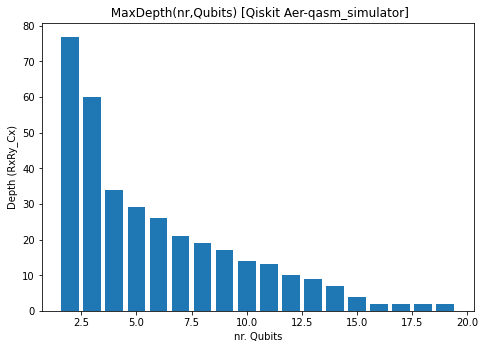

In [20]:
simulator_name='Qiskit Aer-qasm_simulator'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,max_depth)]
ax.bar(langs,depth)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [14]:
def exec_func2(sim, circ):
    return execute(circ, sim, optimization_level=0, shots=shot_count)

from moara_for_qiskit import MoaraSimulator
simulator2 = MoaraSimulator()
depth2=bench(simulator2, max_depth, exec_func2)
print(depth2)

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 76, 50, 32, 15, 7, 4]


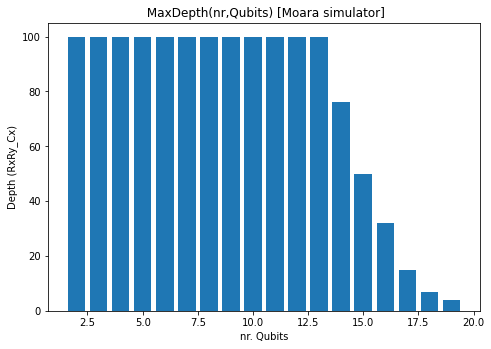

In [15]:
simulator_name2='Moara simulator'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [i for i in range(2,max_depth)]
ax.bar(langs,depth2)
ax.set_title(' MaxDepth(nr,Qubits) ['+ simulator_name2+']')
ax.set_xlabel('nr. Qubits')
ax.set_ylabel('Depth (RxRy_Cx)')
plt.show()

In [16]:
i=20
j=80
circ=test(i,j)
from moara_for_qiskit import MoaraSimulator
sim = MoaraSimulator()
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=shot_count)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)

21.900288105010986


In [21]:
i=20
j=80
circ=test(i,j)

sim = getQiskitSimulator()
start_time = time.time()
res = execute(circ, sim, optimization_level=0, shots=shot_count).result().get_counts(circ)
duration=(time.time() - start_time)
print(duration)
#plot_histogram(res)